In [20]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import locale
from matplotlib.dates import DateFormatter

In [21]:
with open('../input/passenger-dtypes.yaml', 'r') as yamlfile:
    column_types = yaml.safe_load(yamlfile)

read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
                 'dtype': column_types,
                 'parse_dates': ['MissionDate'],
                 'infer_datetime_format': True}

df = pd.read_csv('../input/ice-air-passengers.csv.gz', **read_csv_opts)

In [22]:
pickups = df['PULOC'] == 'KBFI'
dropoffs = df['DropLoc'] == 'KBFI'
kbfi = df.loc[pickups | dropoffs]

In [23]:
kbfi.set_index('MissionDate', inplace=True)

In [24]:
# kbfi = kbfi['2018-10-01':]

In [25]:
del df

In [28]:
# kykm = pd.read_csv('../input/ICEAirKYKM20191016.csv', header=1)
# kykm = pd.read_csv('../input/ICEAirKYKM20191226.csv', header=1)
# kykm = pd.read_csv('../input/ICEAirKYKM20191231.csv', header=1)
# kykm = pd.read_csv('../input/ICEAirKYKM20200505.csv', header=1)
# kykm = pd.read_csv('../input/ICEAirKYKM20200727.csv', header=0)
# kykm = pd.read_csv('../input/ICEAirKYKM20201007.csv', header=0)
# kykm = pd.read_csv('../input/ICEAirKYKM20210615.csv', header=0)
kykm = pd.read_csv('../input/ICEAirKYKM20210625.csv', header=0, sep='|')

In [29]:
kykm.columns

Index(['Date', 'Flight count', 'Flight number', 'Tail number', 'Operator',
       'Owner', 'Previous Airport', 'Next Airport',
       'From NWDC - Boarded Plane', 'From Plane - Boarded Bus to NWDC',
       'From NWDC - Boarded Plane.1', 'From Plane - Boarded Bus to NWDC.1',
       'Snoq Pass', 'White Pass', '# Buses', 'Observations', 'Link'],
      dtype='object')

In [30]:
kykm.head()

,Date,Flight count,Flight number,Tail number,Operator,Owner,Previous Airport,Next Airport,From NWDC - Boarded Plane,From Plane - Boarded Bus to NWDC,From NWDC - Boarded Plane.1,From Plane - Boarded Bus to NWDC.1,Snoq Pass,White Pass,# Buses,Observations,Link
0,"Tuesday, May 7, 2019",1,RPN529,N529AU,"US DHS ICE ""Repatriate""",Swift Air LLC,KIWA,KELP,92.0,40.0,92,40.0,NaN,NaN,?,Only YKM flight under RPN call sign - they sto...,https://flightaware.com/live/flight/RPN529/his...
1,"Sunday, May 12, 2019",2,SWQ3571,N441US,"Swift Air ""Swiftflight""",Swift Air LLC,KELP,KIWA,0.0,90.0,0,100.0,NaN,NaN,3,NaN,https://flightaware.com/live/flight/SWQ3571/hi...
2,"Tuesday, May 14, 2019",3,SWQ3501,N529AU,"Swift Air ""Swiftflight""",Swift Air LLC,KIWA,KLAS,70.0,0.0,78,4.0,NaN,NaN,3,"No female agents, so women weren't patted down",https://flightaware.com/live/flight/N529AU/his...
3,"Saturday, May 18, 2019",4,SWQ3577,N625SW,"Swift Air ""Swiftflight""",Swift Air LLC,KDEN,KIWA,0.0,35.0,0,34.0,NaN,NaN,2,"11 women, 24 men dropped off",https://flightaware.com/live/flight/SWQ3577/hi...
4,"Tuesday, May 21, 2019",5,SWQ3500,N625SW,"Swift Air ""Swiftflight""",Swift Air LLC,KIWA,KLAS,61.0,40.0,61,40.0,NaN,NaN,3,Records received via Yakima Air Terminal inclu...,https://flightaware.com/live/flight/SWQ3500/hi...


In [31]:
kykm = kykm.drop(['From NWDC - Boarded Plane.1', 'From Plane - Boarded Bus to NWDC.1'], axis=1)

In [32]:
kykm = kykm.rename({'From NWDC - Boarded Plane': 'Pickups', 'From Plane - Boarded Bus to NWDC': 'Dropoffs'}, axis=1)

In [33]:
# kykm = kykm.drop(range(63, len(kykm)))

In [34]:
kykm['Date'] = pd.to_datetime(kykm['Date'], errors='coerce')

In [35]:
kykm = kykm[pd.notnull(kykm['Date'])]

In [36]:
kykm.set_index('Date', inplace=True)

In [37]:
kykm = kykm[['Pickups', 'Dropoffs']]

In [38]:
kykm['Airport'] = 'KYKM'

In [39]:
kykm.loc[:,['Pickups', 'Dropoffs']] = kykm[['Pickups', 'Dropoffs']].replace('-', np.nan)

In [40]:
kykm.loc[:,['Pickups', 'Dropoffs']] = kykm.loc[:,['Pickups', 'Dropoffs']].astype(float)

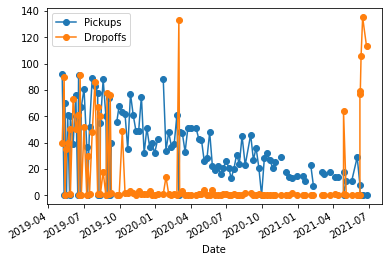

In [41]:
kykm[['Pickups', 'Dropoffs']].plot(marker='o')

In [42]:
data = kykm.resample('W')[['Pickups', 'Dropoffs']].sum()

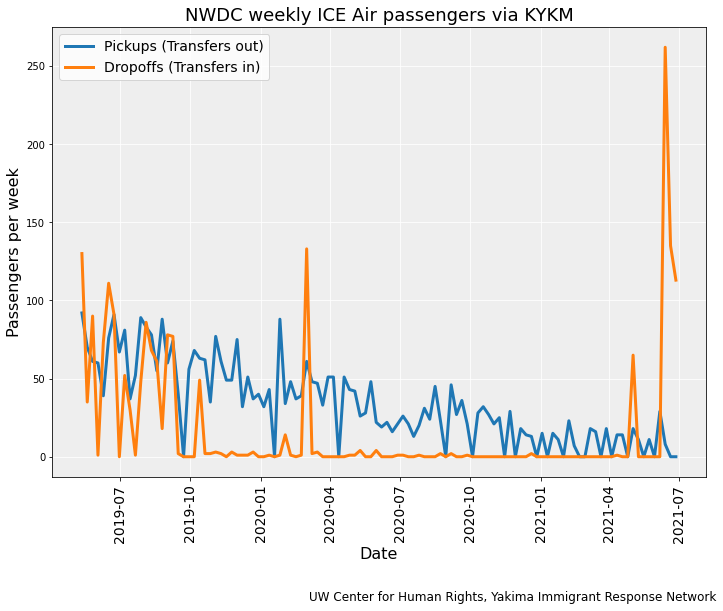

In [43]:
fig, ax = plt.subplots()
# fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(10, 8)

ax.set_axisbelow(True)
ax.set_facecolor('#EEEEEE')
ax.grid(color='#FFFFFF')

x = data.index.values
y = data[['Pickups', 'Dropoffs']]

ax.plot(x, y, lw=3)
plt.xticks(rotation=90, fontsize=14)
plt.xticks(rotation=90, fontsize=14)

ax.set_ylabel('Passengers per week', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.legend(['Pickups (Transfers out)','Dropoffs (Transfers in)'],bbox_to_anchor=(0, 1), loc='upper left', fontsize=14)

plt.title('NWDC weekly ICE Air passengers via KYKM', size=18)

txt='UW Center for Human Rights, Yakima Immigrant Response Network'
plt.figtext(1, -.05, txt, wrap=True, horizontalalignment='right', fontsize=12)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)

fig.tight_layout()

plt.show()

In [44]:
data = kykm.resample('MS')[['Pickups', 'Dropoffs']].sum()

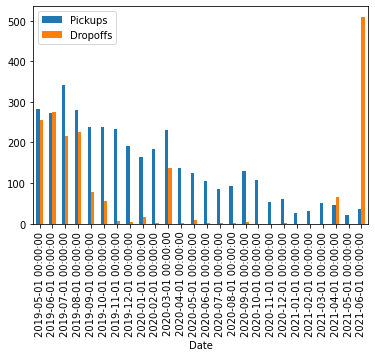

In [45]:
data.plot(kind='bar', stacked=False)

In [46]:
data.index

DatetimeIndex(['2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01'],
              dtype='datetime64[ns]', name='Date', freq='MS')

In [47]:
data['Dropoffs'].max()

510.0

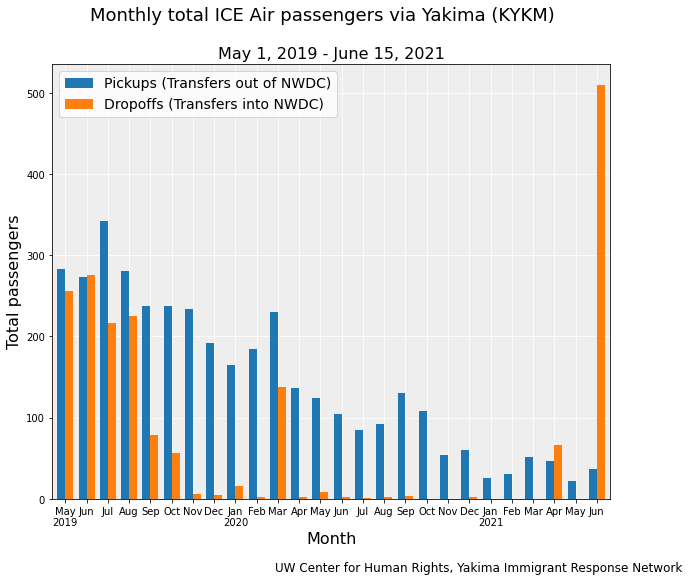

In [48]:
fig, ax = plt.subplots()
# fig, ax = plt.subplots(facecolor='white')

data.plot(ax=ax, kind='bar', width=.75)
ax.set_axisbelow(True)
ax.set_facecolor('#EEEEEE')
ax.grid(color='#FFFFFF')
ax.set_ylabel('Total passengers', fontsize=16)
ax.set_ylim(0)
ax.set_xlabel('Month', fontsize=16)

ax.set_xticks(range(data.index.size))
ax.set_xticklabels([ts.strftime('%b\n%Y') if ts.year != data.index[idx-1].year
                    else ts.strftime('%b') for idx, ts in enumerate(data.index)])

ax.tick_params(labelsize=10)
ax.tick_params(axis='x', rotation=0)

ax.legend(['Pickups (Transfers out of NWDC)','Dropoffs (Transfers into NWDC)'], bbox_to_anchor=(0, 1), loc='upper left', fontsize=14)

plt.suptitle('Monthly total ICE Air passengers via Yakima (KYKM)', fontsize=18)
plt.title('May 1, 2019 - June 15, 2021', fontsize=16)

txt='UW Center for Human Rights, Yakima Immigrant Response Network'
plt.figtext(1, 0, txt, wrap=True, horizontalalignment='right', fontsize=12)

# plt.tight_layout()

fig.set_size_inches(10, 8)
fig.savefig(f'../output/KYKM_2021-06-15', bbox_inches='tight')
plt.show()
plt.close()

In [49]:
locale.setlocale(locale.LC_ALL,'es_ES.utf8')

'es_ES.utf8'

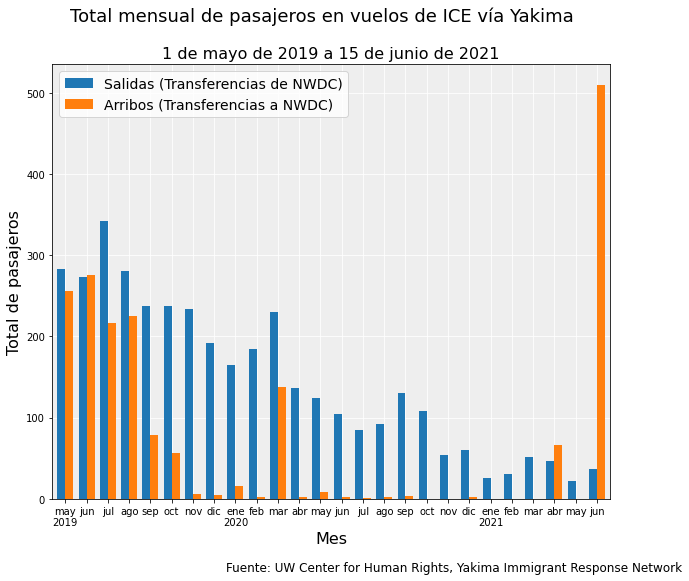

In [50]:
fig, ax = plt.subplots()
# fig, ax = plt.subplots(facecolor='white')

data.plot(ax=ax, kind='bar', width=.75)
ax.set_axisbelow(True)
ax.set_facecolor('#EEEEEE')
ax.grid(color='#FFFFFF')
ax.set_ylabel('Total de pasajeros', fontsize=16)
ax.set_ylim(0)
ax.set_xlabel('Mes', fontsize=16)

ax.set_xticks(range(data.index.size))
ax.set_xticklabels([ts.strftime('%b\n%Y') if ts.year != data.index[idx-1].year
                    else ts.strftime('%b') for idx, ts in enumerate(data.index)])

ax.tick_params(labelsize=10)
ax.tick_params(axis='x', rotation=0)

ax.legend(['Salidas (Transferencias de NWDC)','Arribos (Transferencias a NWDC)'], bbox_to_anchor=(0, 1), loc='upper left', fontsize=14)

plt.suptitle('Total mensual de pasajeros en vuelos de ICE vía Yakima', fontsize=18)
plt.title('1 de mayo de 2019 a 15 de junio de 2021', fontsize=16)

txt='Fuente: UW Center for Human Rights, Yakima Immigrant Response Network'
plt.figtext(1, 0, txt, wrap=True, horizontalalignment='right', fontsize=12)

# plt.tight_layout()

fig.set_size_inches(10, 8)
fig.savefig(f'../output/KYKM_2021-06-15_es_tras.png', bbox_inches='tight', transparent=True)
plt.show()
plt.close()

In [51]:
kbfi.head()

,ANumber,LastName,FirstName,DOB,Status,Sex,Convictions,GangMember,ClassLvl,Age,...,st2_StateAbbr,aor2_AORID,aor2_AOR,aor2_AORName,air2_Country,air_LatitudeDecimalDegrees,air_LongitudeDecimalDegrees,air2_LatitudeDecimalDegrees,air2_LongitudeDecimalDegrees,NonCriminal
MissionDate,,,,,,,,,,,,,,,,,,,,,
2010-10-02,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),NTA-TRANSFER,M,Criminal-Other,NO,2.0,51.0,...,WA,22.0,SEA,Seattle,USA,33.307833,-111.655472,47.53,-122.302,False
2010-10-02,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),ER-TRANSFER,M,Non-Criminal,NO,1.0,43.0,...,WA,22.0,SEA,Seattle,USA,33.307833,-111.655472,47.53,-122.302,False
2010-10-02,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),ER-TRANSFER,M,Non-Criminal,NO,1.0,35.0,...,WA,22.0,SEA,Seattle,USA,33.307833,-111.655472,47.53,-122.302,False
2010-10-02,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),ER-TRANSFER,M,Non-Criminal,NO,1.0,26.0,...,WA,22.0,SEA,Seattle,USA,33.307833,-111.655472,47.53,-122.302,False
2010-10-02,(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),(B)(6);(B)(7)(C),NTA-TRANSFER,M,Criminal-Other,NO,1.0,57.0,...,WA,22.0,SEA,Seattle,USA,33.307833,-111.655472,47.53,-122.302,False


In [52]:
pickups = kbfi['PULOC'] == 'KBFI'
dropoffs = kbfi['DropLoc'] == 'KBFI'

In [53]:
d = {'Pickups': kbfi[pickups].resample('D').size(), 'Dropoffs': kbfi[dropoffs].resample('D').size()}

In [54]:
kbfi = pd.DataFrame(d)
kbfi = kbfi[(kbfi.T != 0).any()]

In [55]:
kbfi['Airport'] = 'KBFI'

In [56]:
kbfi.resample('MS')[['Pickups', 'Dropoffs']].sum()

,Pickups,Dropoffs
MissionDate,,
2010-10-01,515,100
2010-11-01,479,14
2010-12-01,544,4
2011-01-01,693,5
2011-02-01,545,12
...,...,...
2018-12-01,312,203
2019-01-01,369,315
2019-02-01,246,171


In [77]:
kbfi.resample('MS')[['Pickups', 'Dropoffs']].sum().sort_values(by='Dropoffs', ascending=False)

,Pickups,Dropoffs
MissionDate,,
2014-06-01,405,459
2015-05-01,233,441
2014-03-01,385,412
2014-08-01,255,404
2015-06-01,422,391
...,...,...
2015-03-01,253,4
2014-10-01,270,3
2017-05-01,297,3


In [75]:
kykm.resample('MS')[['Pickups', 'Dropoffs']].sum().max()

Pickups     342.0
Dropoffs    510.0
dtype: float64

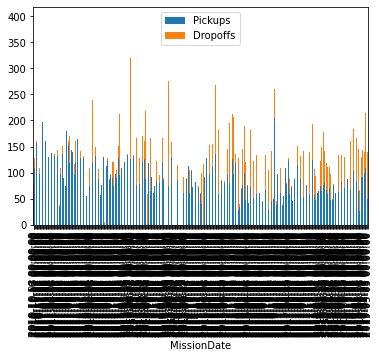

In [58]:
kbfi.resample('W')[['Pickups', 'Dropoffs']].sum().plot(kind='bar', stacked=True);

In [59]:
kbfi.loc['2019'].resample('M')[['Pickups', 'Dropoffs']].sum()

,Pickups,Dropoffs
MissionDate,,
2019-01-31,369,315
2019-02-28,246,171
2019-03-31,346,235
2019-04-30,398,365


In [101]:
data = pd.concat([kbfi, kykm])

In [102]:
data = data.fillna(0)

In [103]:
data = data.resample('MS')[['Pickups', 'Dropoffs']].sum()

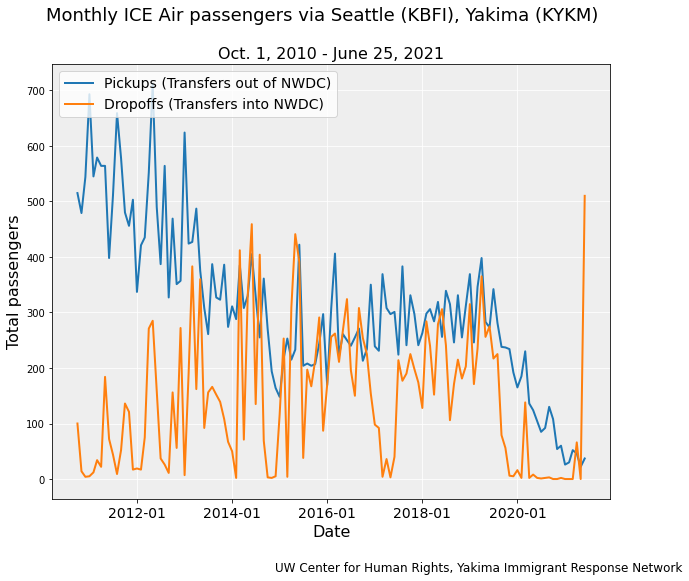

In [132]:
# fig, ax = plt.subplots()
fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(10, 8)

ax.set_axisbelow(True)
ax.set_facecolor('#EEEEEE')
ax.grid(color='#FFFFFF')

x = data.index.values
y = data[['Pickups', 'Dropoffs']]

ax.plot(x, y, lw=2)
plt.xticks(rotation=0, fontsize=14)

ax.set_ylabel('Total passengers', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.legend(['Pickups (Transfers out of NWDC)','Dropoffs (Transfers into NWDC)'],bbox_to_anchor=(0, 1), loc='upper left', fontsize=14)

plt.suptitle('Monthly ICE Air passengers via Seattle (KBFI), Yakima (KYKM)', fontsize=18)
plt.title('Oct. 1, 2010 - June 25, 2021', fontsize=16)

txt='UW Center for Human Rights, Yakima Immigrant Response Network'
plt.figtext(1, 0, txt, wrap=True, horizontalalignment='right', fontsize=12)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)

fig.set_size_inches(10, 8)
fig.savefig(f'../output/KYKM_2021-06-25_en.png', dpi=100, transparent=False)
plt.show()

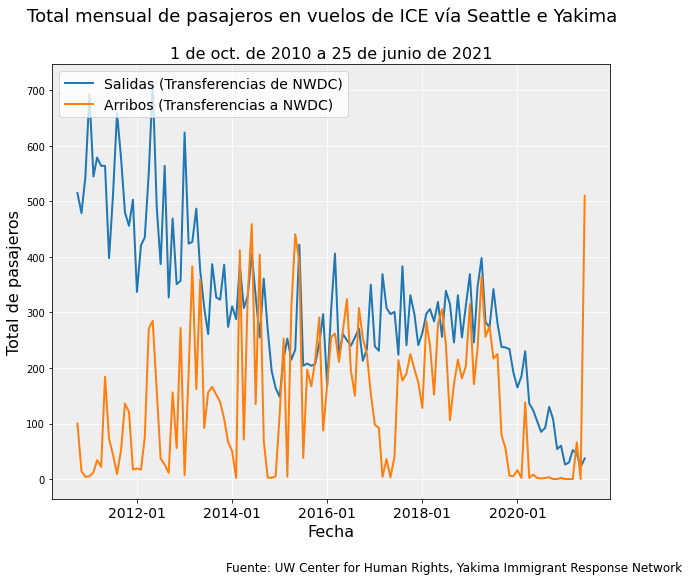

In [137]:
fig, ax = plt.subplots()
# fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(10, 8)

ax.set_axisbelow(True)
ax.set_facecolor('#EEEEEE')
ax.grid(color='#FFFFFF')

x = data.index.values
y = data[['Pickups', 'Dropoffs']]

ax.plot(x, y, lw=2)
plt.xticks(rotation=0, fontsize=14)

ax.set_ylabel('Total de pasajeros', fontsize=16)
ax.set_xlabel('Fecha', fontsize=16)
ax.legend(['Salidas (Transferencias de NWDC)','Arribos (Transferencias a NWDC)'],bbox_to_anchor=(0, 1), loc='upper left', fontsize=14)

plt.suptitle('Total mensual de pasajeros en vuelos de ICE vía Seattle e Yakima', fontsize=18)
plt.title('1 de oct. de 2010 a 25 de junio de 2021', fontsize=16)

txt='Fuente: UW Center for Human Rights, Yakima Immigrant Response Network'
plt.figtext(1, 0, txt, wrap=True, horizontalalignment='right', fontsize=12)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)

fig.set_size_inches(10, 8)
# fig.savefig(f'../output/KYKM_2021-06-25_es.png', dpi=100, transparent=False)
fig.savefig(f'../output/KYKM_2021-06-25_es_tras.png', dpi=100, transparent=True)
plt.show()

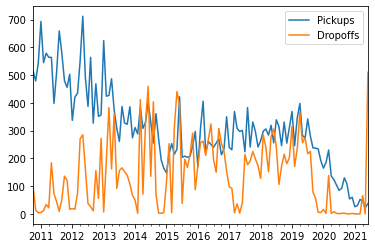

In [84]:
temp.resample('MS')[['Pickups', 'Dropoffs']].sum().plot();

In [65]:
data = temp[temp['Airport'] == 'KYKM'].resample('M')[['Pickups', 'Dropoffs']].sum()

In [66]:
# data.index = data.index.month_name().str[0:3]

In [67]:
data

,Pickups,Dropoffs
2020-01-31,165.0,16.0
2020-02-29,185.0,2.0
2020-03-31,230.0,138.0
2020-04-30,136.0,2.0
2020-05-31,124.0,8.0
2020-06-30,104.0,2.0
2020-07-31,85.0,1.0
2020-08-31,92.0,2.0
2020-09-30,130.0,3.0


In [68]:
# temp.groupby(['Airport', pd.Grouper(freq='MS')]).sum().to_csv('ICEAirKBFIKYKM2019.csv')

In [69]:
def bar_chart(data, airport=str, airport_name=str, filename=str, title=str):
    fig, ax = plt.subplots()
    
    # FY shading
#     ax.axvspan(-2, 6.5, facecolor='g', alpha=0.1)
#     ax.axvspan(6.5, 14, facecolor='y', alpha=0.1)
    
    # CY shading
#     ax.axvspan(-2, 3.5, facecolor='g', alpha=0.1)
#     ax.axvspan(3.5, 14, facecolor='y', alpha=0.1)
    
    data.plot(kind='bar',
              ax=ax,
              stacked=True,
              title=f'{airport_name}',
              grid=True,
              figsize=(8,6),
              fontsize=14,
#               color=['g','y'],
              alpha=1)
    ax.set_axisbelow(True)
    ax.set_facecolor('#EEEEEE')
    ax.grid(color='#FFFFFF')
    ax.set_ylabel('Number of Passengers', fontsize=16)
    ax.set_ylim(0)
#     ax.set_xlabel('Month, FY19', fontsize=16)

    ax.set_title(f'{title}', fontsize=18)
    ax.tick_params(labelsize=14, labelrotation=0)
    

    
    ax.legend(bbox_to_anchor=(1.25, 1), loc='upper right', fontsize=14)
    
#     plt.figtext(.225, .825, 'KBFI (ICE data)', horizontalalignment='center', fontsize=16)
#     plt.figtext(.75, .825, 'KYKM (YIRN obs.)', horizontalalignment='center', fontsize=16)
    
    txt='UW Center for Human Rights, Yakima Immigrant Response Network'
    plt.figtext(1, 0, txt, wrap=True, horizontalalignment='right', fontsize=12)
    
#     plt.tight_layout()
    
    fig.set_size_inches(10, 8)
    fig.savefig(f'../output/KYKM_2020.png', bbox_inches='tight')
    plt.show()
    plt.close()

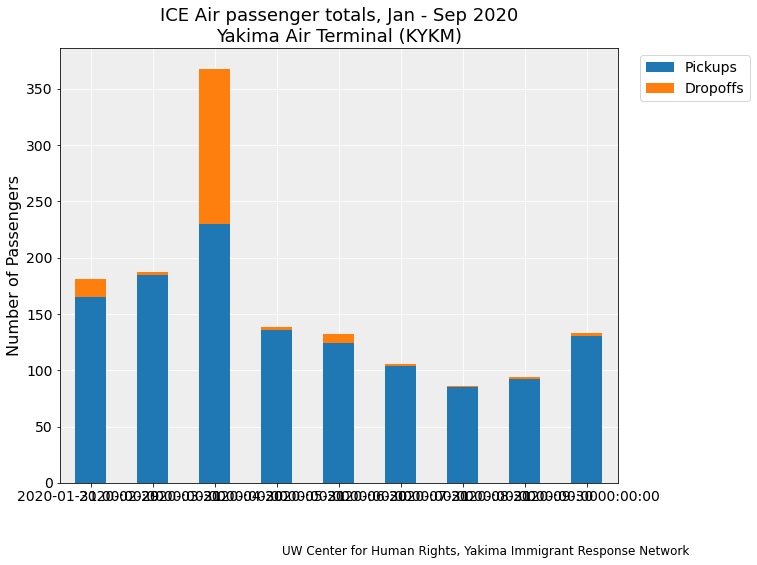

In [70]:
title = 'ICE Air passenger totals, Jan - Sep 2020\nYakima Air Terminal (KYKM)'
bar_chart(data, title=title)

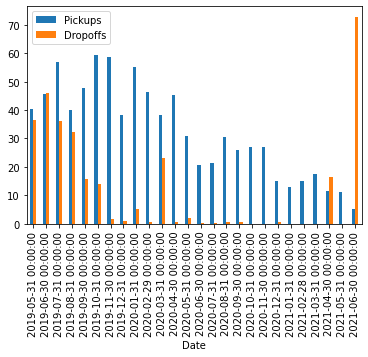

In [71]:
kykm.groupby([pd.Grouper(freq='M')]).mean().plot(kind='bar')

In [72]:
kykm.groupby([pd.Grouper(freq='MS')]).mean()

,Pickups,Dropoffs
Date,,
2019-05-01,40.428571,36.571429
2019-06-01,45.500000,45.833333
2019-07-01,57.000000,36.166667
2019-08-01,40.142857,32.142857
2019-09-01,47.600000,15.800000
2019-10-01,59.250000,14.000000
2019-11-01,58.500000,1.500000
2019-12-01,38.400000,1.000000
2020-01-01,55.000000,5.333333


In [73]:
temp.loc['2020-03':].sum()

Pickups                                                   901
Dropoffs                                                  156
Airport     KYKMKYKMKYKMKYKMKYKMKYKMKYKMKYKMKYKMKYKMKYKMKY...
dtype: object

In [74]:
temp

,Pickups,Dropoffs,Airport
2020-01-07,43.0,1.0,KYKM
2020-01-14,0.0,0.0,KYKM
2020-01-21,88.0,1.0,KYKM
2020-01-28,34.0,14.0,KYKM
2020-02-04,48.0,1.0,KYKM
2020-02-11,37.0,0.0,KYKM
2020-02-18,39.0,1.0,KYKM
2020-02-25,61.0,0.0,KYKM
2020-03-01,0.0,133.0,KYKM
2020-03-03,48.0,2.0,KYKM
